In [2]:
import numpy as np
from IPython.display import display
import pandas as pd

In [16]:
# Example DataFrame
data = {'A': [1, None, 3, None], 'B': [None, 2, None, 4]}
df = pd.DataFrame(data)

# Forward fill
df_ffill = df.ffill()

print(df)
print(df.ffill())

print(df.bfill())

print(df.bfill().ffill())

     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  NaN
3  NaN  4.0
     A    B
0  1.0  NaN
1  1.0  2.0
2  3.0  2.0
3  3.0  4.0
     A    B
0  1.0  2.0
1  3.0  2.0
2  3.0  4.0
3  NaN  4.0
     A    B
0  1.0  2.0
1  3.0  2.0
2  3.0  4.0
3  3.0  4.0


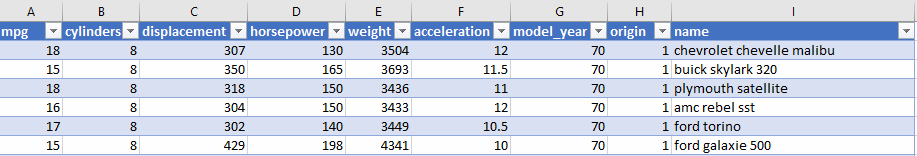

mpg (צריכת דלק במיילים לגלון)
cylinders (מספר צילינדרים)
displacement (נפח מנוע) 
horsepower (כוח סוס)
weight (משקל) pound
acceleration (תאוצה) 0-60 mph
model_year (שנת דגם)
origin (מקור) - USA EU JAPAN
name (שם)

In [10]:
df = pd.read_csv("mpg.csv")

#display(df)
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [45]:
df = pd.read_csv("mpg.csv")

df.groupby('model_year')['weight'].mean()  # Series
df.groupby('model_year')[['weight']].mean()  # DataFrame
df.groupby('model_year')[['weight']].max()  
df.groupby('model_year')[['weight']].min()  
df.groupby('model_year')['weight'].value_counts().sort_values()
display(df.groupby('model_year')['model_year'].value_counts())
display(df.groupby('model_year').size())  # how many in each group
display(df['model_year'].unique())
display(df['model_year'].value_counts())
df.groupby('model_year')['cylinders'].value_counts()


model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: count, dtype: int64

model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
dtype: int64

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

model_year  cylinders
70          8            18
            4             7
            6             4
71          4            13
            6             8
            8             7
72          4            14
            8            13
            3             1
73          8            20
            4            11
            6             8
            3             1
74          4            15
            6             7
            8             5
75          4            12
            6            12
            8             6
76          4            15
            6            10
            8             9
77          4            14
            8             8
            6             5
            3             1
78          4            17
            6            12
            8             6
            5             1
79          4            12
            8            10
            6             6
            5             1
80          4            2

In [52]:
df = pd.read_csv("mpg.csv")

groups = df.groupby('model_year')[['weight', 'mpg']].mean().reset_index()
display(groups[groups['model_year'] < 80])

# group by model_year and show max horsepower and avg acceleration
# find all rows which are between model year 75 - 80
# find all rows which max horsespower > 100 and avg acceleration < 15


,model_year,weight,mpg
0,70,3372.793103,17.689655
1,71,2995.428571,21.250000
2,72,3237.714286,18.714286
3,73,3419.025000,17.100000
4,74,2877.925926,22.703704
5,75,3176.800000,20.266667
6,76,3078.735294,21.573529
7,77,2997.357143,23.375000
8,78,2861.805556,24.061111
9,79,3055.344828,25.093103
